# Project on Heart Disease Prediction based on SVM model With Hyperparameter optimisation

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np

In [2]:
#reading and understanding data
df=pd.read_csv('dataset.csv')
df.head()

In [4]:
#shape of the data
df.shape

(303, 14)

In [5]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#looking at the balance of the target feature
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

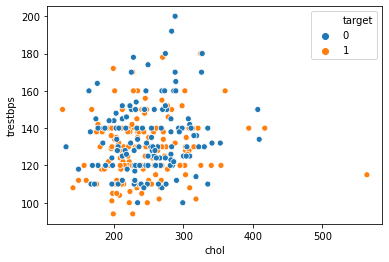

In [25]:
#looking at the distribution of two feature
import seaborn as sb
sb.scatterplot(data=df,x='chol',y='trestbps',hue='target')

In [26]:
#dividing the feature to target and predictor features
X=df.drop('target',axis=1)
y=df.target

In [10]:
#Doing feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_x=scaler.fit_transform(X)
scaled_x=pd.DataFrame(scaled_x,columns=[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']])

In [14]:
#splitting data to train -test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(scaled_x,y,test_size=.25)

In [16]:
#importing SVM and fitting training data to it
from sklearn import svm
model_fit=svm.SVC().fit(X_train,y_train)

In [17]:
#predicted the test data based on the model fitting
y_pred=model_fit.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [18]:
#looking at the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8421052631578947

### Now let's do some hyperparameter tuning

In [19]:
#importing the randomisedSearchCV to do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid={'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
          'gamma' : [1,.1,.01,.001],
           'C':[.1,10,100,1]}

In [22]:
#fitting the data and getting the optimal hyperparamters of the model
res_cv=RandomizedSearchCV(estimator=model_fit,param_distributions=param_grid,cv=3,n_iter=100,verbose=3)
res_cv.fit(X_train,y_train)

C:\Users\AKASH pc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] kernel=linear, gamma=1, C=0.1 ...................................
[CV] ....... kernel=linear, gamma=1, C=0.1, score=0.829, total=   0.0s
[CV] kernel=linear, gamma=1, C=0.1 ...................................
[CV] ....... kernel=linear, gamma=1, C=0.1, score=0.829, total=   0.0s
[CV] kernel=linear, gamma=1, C=0.1 ...................................
[CV] ....... kernel=linear, gamma=1, C=0.1, score=0.720, total=   0.0s
[CV] kernel=poly, gamma=1, C=0.1 .....................................
[CV] ......... kernel=poly, gamma=1, C=0.1, score=0.855, total=   0.0s
[CV] kernel=poly, gamma=1, C=0.1 .....................................
[CV] ......... kernel=poly, gamma=1, C=0.1, score=0.855, total=   0.0s
[CV] kernel=poly, gamma=1, C=0.1 .....................................
[CV] ......... kernel=poly, gamma=1, C=0.1, score=0.787, total=   0.0s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    2.4s finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100,
                   param_distributions={'C': [0.1, 10, 100, 1],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=3)

In [23]:
#best parameter of the model
res_cv.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 10}

In [24]:
#improved accuracy of our model
res_cv.best_score_

0.845438596491228

Oh yes, Our accuracy increased by a good margin